# Machine Learning (Scikit-learn): Binary Classifier

In this document, the performance of 4 different Machine Learning (ML) algorithms are compared to solve the binary classification problem. The following algorithms are implemented:

Algorithm 1: Logistic Regression.

Algorithm 2: Decision Tree Classifier.

Algorithm 3: Random Forest Classifier.

Algorithm 4: Gradient Boosting Classifier.

## Exploratory data analysis (EDA)

In [18]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

Note that the following algorithms do not have attribute 'predict_proba' (they are used for regression), so classifiers are used instead.

In [19]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [20]:
# Read DataFrame
df = pd.read_csv('./Electrical_Grid_Stability_us.csv', sep=';', header=0)

# Show DataFrame
df.head(3)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stability
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0


Column 'stability' will be renamed.

In [21]:
# Rename column 'stability' to 'Churn'
df = df.rename(columns={'stability': 'Churn'})

# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  Churn   10000 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 1015.8 KB


Format of all columns is correct.

## Data preprocessing

Data preprocessing consist of:
1. Filling null values and dropping duplicates.
2. Processing outliers and multicollinearity.
3. Converting categorical variables into binary ones.
4. Standardizing (scaling) the data.

### Fill null values and drop duplicates

In [22]:
# Verify the number of null values per column
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
Churn    0
dtype: int64

In [23]:
# Delete duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

# Show duplicate rows
print(df.duplicated().sum())

0


### Process outliers and multicollinearity

A box plot is shown to verify if there exist outliers (no outliers).

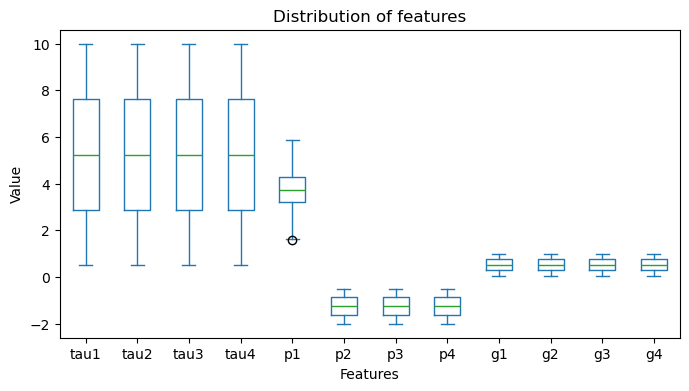

In [24]:
# Box plot
df.drop('Churn',axis=1).plot(kind='box', figsize=[8,4],
title='Distribution of features', xlabel='Features', ylabel='Value')
plt.xticks(rotation=0)
plt.show()

In order to see multicollinearity, a heatmap is shown.

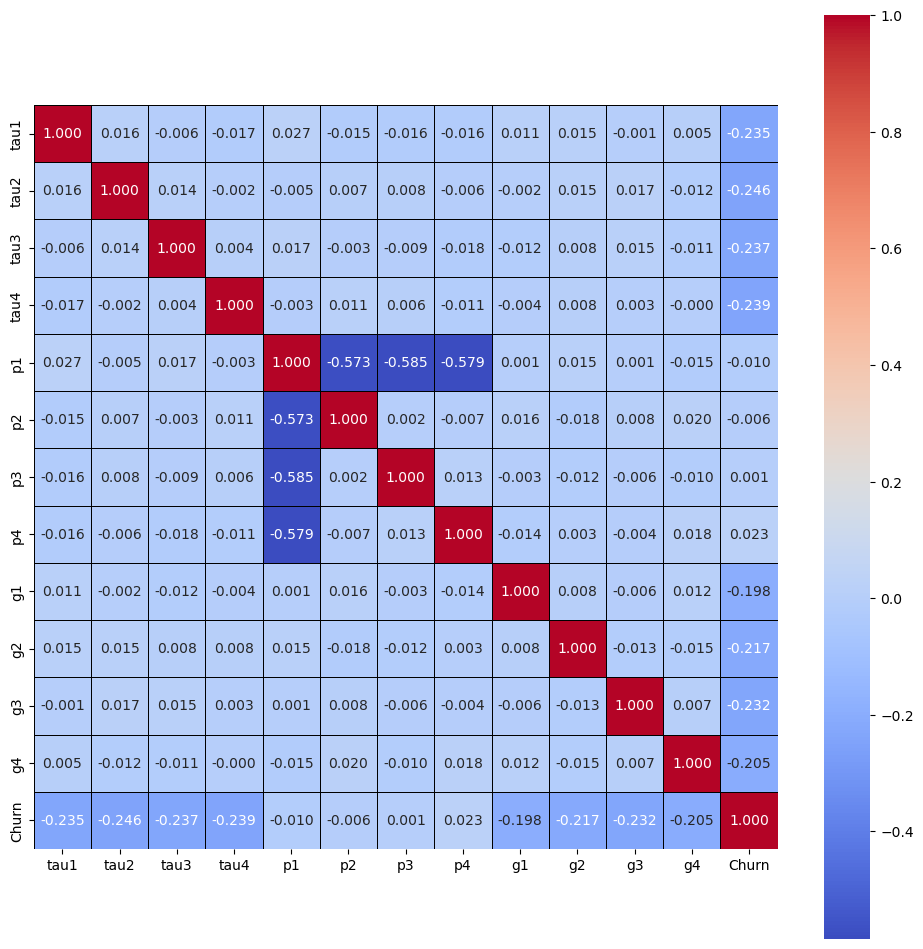

In [25]:
# Correlation matrix
cm = df.corr()

# Heatmap
plt.figure(figsize = (12,12))
sns.heatmap(cm, annot=True, square=True, cmap='coolwarm', fmt='.3f',
            annot_kws={"size": 10}, linewidths=0.5, linecolor='black')
plt.show()

It can be seen that columns 'p2' and 'p3' are partically not correlated to the objective variable 'Churn'. Besides, columns 'p2', 'p3' and 'p4' are correlated to 'p1'. It is not necessary to delete them, the algorithms can handle it.

### Convert categorical variables

DataFrame does not have categorical variables.

### Data standarization

In [26]:
# Obtain characteristic matrix (x) and objective variable (y)
x = df.drop('Churn', axis=1)
y = df['Churn']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

# Train the StandardScaler by using 'x_train'
scaler = StandardScaler()
scaler.fit(x_train)

# Standardize x_test and x_test
x_train_st = scaler.transform(x_train)
x_test_st = scaler.transform(x_test)

The data for training and validation are ready.

**Remark:** By verifying data balance, it can be seen that data is not balanced, but this unbalance is
not considerable for the model training.

In [27]:
# Ratio between binary classes
df['Churn'].value_counts()

Churn
0    6380
1    3620
Name: count, dtype: int64

## Models creation

Four different models will be created.

In [28]:
def print_all_metrics(y_true, y_pred, y_proba, title=''):
    '''Function to obtain all metrics for classification models'''
    print(title)
    print('\tAccuracy: {:.2%}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2%}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2%}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2%}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2%}'.format(roc_auc_score(y_true, y_proba)))

In [29]:
# Algorithm 1: Logistic Regression -------------------------
lr_model = LogisticRegression(random_state=0)
# Train the model
lr_model.fit(x_train_st, y_train)
# Make predictions
lr_predictions = lr_model.predict(x_test_st)
# Obtain the probabilities of the positive class
lr_probabilities = lr_model.predict_proba(x_test_st)[:, 1]
# Print all metrics
print_all_metrics(y_test, lr_predictions, lr_probabilities,
                  title='Logistic Regression: ')

# Algorithm 2: Decision Tree Classifier -------------------
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(x_train_st, y_train)
tree_predictions = tree_model.predict(x_test_st)
tree_probabilities = tree_model.predict_proba(x_test_st)[:, 1]
print_all_metrics(y_test, tree_predictions, tree_probabilities,
                  title='Decision Tree Classifier: ')

# Algorithm 3: Random Forest Classifier -------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(x_train_st, y_train)
rf_predictions = rf_model.predict(x_test_st)
rf_probabilities = rf_model.predict_proba(x_test_st)[:, 1]
print_all_metrics(y_test, rf_predictions, rf_probabilities,
                  title='Random Forest Classifier: ')

# Algorithm 4: Gradient Boosting Classifier -----------------
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb_model.fit(x_train_st, y_train)
gb_predictions = gb_model.predict(x_test_st)
gb_probabilities = gb_model.predict_proba(x_test_st)[:, 1]
print_all_metrics(y_test, gb_predictions, gb_probabilities,
                  title='Gradient Boosting Classifier: ')

Logistic Regression: 
	Accuracy: 81.50%
	Precision: 76.84%
	Recall: 70.29%
	F1: 73.42%
	ROC_AUC: 88.97%
Decision Tree Classifier: 
	Accuracy: 83.40%
	Precision: 77.17%
	Recall: 77.17%
	F1: 77.17%
	ROC_AUC: 82.06%
Random Forest Classifier: 
	Accuracy: 91.85%
	Precision: 92.60%
	Recall: 84.32%
	F1: 88.26%
	ROC_AUC: 98.09%
Gradient Boosting Classifier: 
	Accuracy: 92.65%
	Precision: 94.07%
	Recall: 85.14%
	F1: 89.39%
	ROC_AUC: 97.93%


**Conclusion:** 'Gradient Boosting Classifier' obtained better results.

**Remark:** The column names, logistic regression coefficients (for algorithm 1: Logistic Regression) and feature importances coefficients (for Algorithm 4: Gradient Boosting Classifier) are displayed to show which features most impact the algorithm's verdict.

In [30]:
# Show features
print(x.columns)

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4'],
      dtype='object')


In [31]:
# Feature weights
print(lr_model.coef_)

[[-0.86365964 -0.89251641 -0.8673052  -0.91446972  0.00468658 -0.00453614
  -0.05180581  0.04821345 -0.74005673 -0.79408122 -0.87268464 -0.77613864]]


In [32]:
# feature importances
print(gb_model.feature_importances_)

[1.33665414e-01 1.55383743e-01 1.42137883e-01 1.36630606e-01
 2.45347528e-04 8.06981710e-05 0.00000000e+00 1.57983828e-04
 1.05036454e-01 1.05866884e-01 1.13696956e-01 1.07098031e-01]


Practically columns 'p1', 'p2', 'p3' and 'p4' are not considered in the models, as expected.